# Predicting Academic Performance

Dhruv Kaul

## 1. Introduction

The dataset we will be working with today contains information regarding students academic performance, specifically in mathamatics. Within this dataset, you will find details rearding the students habits, family background, grades, and more. In this analysis, we will attempt to predict a students grade based on certain factors, with the intention of hoping to find relationships between certain variabales.    

The results of this analysis would be very valuable to a multitude of people. For insatnce, policy makers, teachers, and even parents who homeschool their children could benefit from the results of this analysis. The findings of this analysis could potentially help teachers and policy makers tailor their cirriculumns to help students improve their grades, which would in turn bulster the reputation of their institution. 

Within this analysis, we will answer the following sets of research questions. For our linear regression model, we will answer: What is the relationship between a students past failed classes and their final grade, after controlling for study time, absences, health, and their first and second period grades. Additionally, how does my model perform on new data? Is the RMSE for the test data higher or lower than for the training data? For our logistic regression model, we will answer: Is there a relationship between a student wanting to pursue higher education and varibales such as study time, failures, family support, and their first and second period grades? Furthermore, how does a classifier built on this model perform on our data? As stated previously, teachers and policy makers would greatly benefit from the answers to these questions, as it would help them perform curriculum changes that would help students achieve higher grades and any other academic aspirations they may have.

In [7]:
#Imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                
sns.set() 
import scipy.stats as stats
import statsmodels as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [8]:
df = pd.read_csv('student-mat.csv', sep = ';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df.shape

(395, 33)

In [10]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## 2. Linear Regression Analytical Tasks

The research questions we will be answering in this section will be as follows: "what is the relationship between a students past failed classes and their final grade, after controlling for study time, absences, health, and their first and second period grades. Additionally, how does my model perform on new data? Is the RMSE for the test data higher or lower than for the training data?

In [11]:
# Split the data into training and testing data sets
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 175)

In [12]:
# Fit the linear regression model & show the summary
linear_model = smf.ols('G3 ~ studytime + absences + failures + health + G1 + G2', data = df_train).fit()
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     256.1
Date:                Sat, 11 May 2024   Prob (F-statistic):          1.03e-116
Time:                        15:27:58   Log-Likelihood:                -651.50
No. Observations:                 316   AIC:                             1317.
Df Residuals:                     309   BIC:                             1343.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.9137      0.570     -3.360      0.001      -3.035      -0.793
studytime     -0.1681      0.128     -1.310      0.191      -0.421       0.084
absences       0.0368      0.014      2.691      0.008       0.010       0.064
failures      -0.1100      0.161     -0.682      0.496      -0.427       0.207
health         0.0486      0.078      0.624      0.533      -0.105       0.202
G1             0.1657      0.065      2.563      0.011       0.038       0.293
G2             0.9834      0.055     17.838      0.000       0.875       1.092
==============================================================================
Omnibus:                      179.054   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1033.993
Skew:                          -2.396   Prob(JB):                    2.96e-225
Kurtosis:                      10.454   Cond. No.                         93.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitted Equation: G3_hat (final grade) = -1.9137 + (-0.1681 * studytime) + (0.0368 * absences) + (-0.1100 * failures) + (0.0486 * health) + (0.1657 * G1 (first period grade)) + (0.9834 * G2 (second period grade))

For every additional past class that a student has failed, we expect a decrease of 0.1100 units in the final grade (G3), holding other variables constant.

The 95% confidence interval for the "failures" predictor is [-0.427, 0.207]. Since this range contains 0, it is likely that the number of past classes a student has failed does not have a significant relationship with their final grade. 

In [13]:
# Linear regression models must meet the following conditions:
# 1.) The response variable must be quantitative (in this case it is) 
# 2.) The relationship between the predictor variables and the response variable must be linear (can be verified with a fitted vs residuals plot)
# 3.) No Multicolinearity (can be verified with a pairplot or a correlation matrix)
# 4.) Independence between observations (in this case independence can be assumed)
# 5.) Normality; the true errors are normally distributed 
# 6.) Equal Varience; there is an equal varience of y at every x

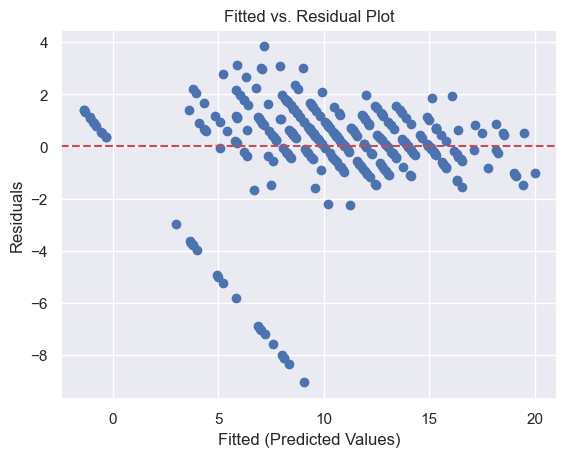

In [14]:
# Check for linearity by using a fitted vs residuals plot
plt.scatter(linear_model.fittedvalues, linear_model.resid)
plt.axhline(y = 0, color = 'r', linestyle = '--')  
plt.xlabel("Fitted (Predicted Values)")
plt.ylabel("Residuals")
plt.title("Fitted vs. Residual Plot")
plt.show()

Based on the results of our fitted vs. residuals plot, we can see that our dataset does not meet the linearity condition. There is not an even amount of data points above and below the red dotted line. Furthermore, the red line does not seem to follow the direction of our data (which is negative). Thus, our model is not suitable for this data set.

C:\Users\dhruv\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dhruv\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

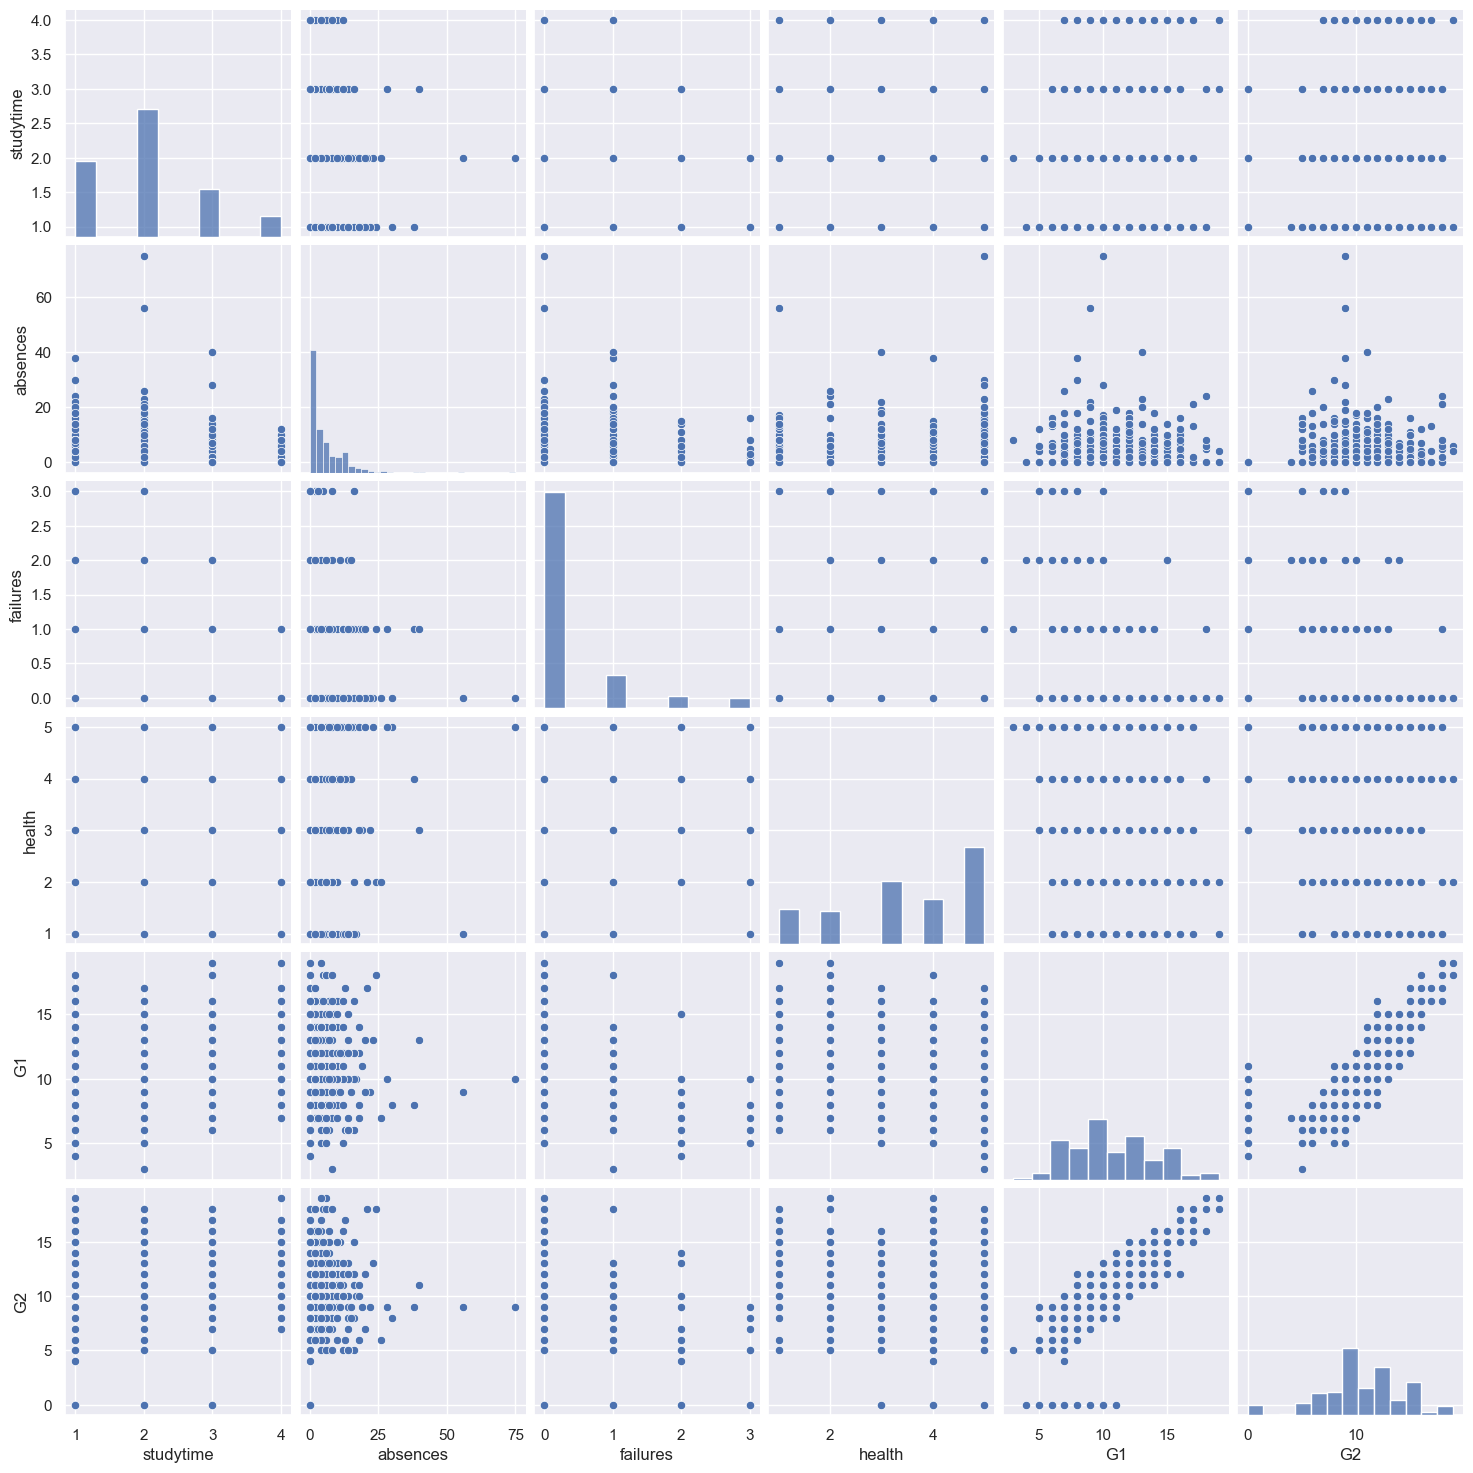

In [15]:
# Check for multicolinearity using a pairplot
predictors = ['studytime', 'absences', 'failures', 'health', 'G1', 'G2']
sns.pairplot(df_train[predictors])
plt.show()

In [16]:
# Check for multicolinearity using a correlation matrix
df_train[['studytime', 'absences', 'failures', 'health', 'G1', 'G2']].corr()

,studytime,absences,failures,health,G1,G2
studytime,1.000000,-0.081450,-0.209704,-0.056639,0.173370,0.165251
absences,-0.081450,1.000000,0.051514,-0.007077,-0.002823,-0.007417
failures,-0.209704,0.051514,1.000000,0.120317,-0.356936,-0.337520
health,-0.056639,-0.007077,0.120317,1.000000,-0.106993,-0.136717
G1,0.173370,-0.002823,-0.356936,-0.106993,1.000000,0.856464
G2,0.165251,-0.007417,-0.337520,-0.136717,0.856464,1.000000


As we can see from our pair plot and correlation matrix, there is a multicolinearity probelm with two of our predictors, "G1" and "G2". The issue with multicolinearity is that it makes our slope estimates unreliable, in turn creating a sense of uncertainty around the results of our analysis.

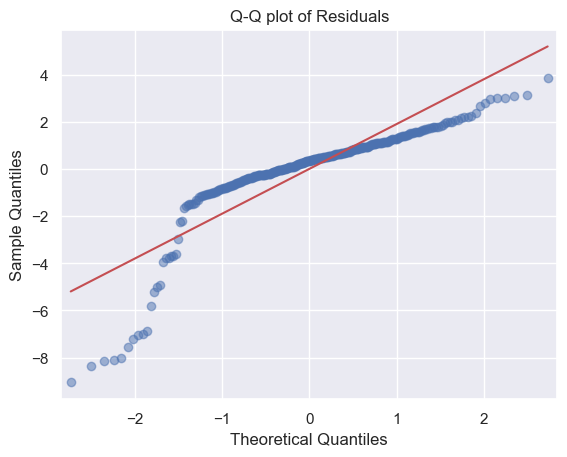

In [17]:
# Check for normality using a QQ plot
predictions = linear_model.predict(df_train)
residuals = linear_model.resid
qqplot = ProbPlot(residuals)
qqplot.qqplot(line='s', alpha=0.5, lw=1)
plt.title('Q-Q plot of Residuals')
plt.show()

Although the line in our QQ plot captures the overall direction of our data, there are many points that fall very far away from our line. Due to this, the normailty of our data is brought into questoin. 

From the results of this model, we can see that the R^2 value is 0.833, which tells us that roughly 83.3% of variability in our response variable is explained by this model in the training data This is relatively high, as the values for R^2 range from 0 to 1. Thus, a high value for the R^2 is a key indicator that the model is a good fit for the data. 

In [18]:
random_obs = df_test.sample(1)
random_obs = pd.DataFrame(random_obs)

In [19]:
predicted = linear_model.predict(random_obs)
actual = random_obs['G3']
residual = actual - predicted
print("Residual: ", residual)

Residual:  340   -0.387654
dtype: float64


In [20]:
y_pred_train = linear_model.predict(df_train)
y_pred_test = linear_model.predict(df_test)
rmse_train = mean_squared_error(df_train['G3'], y_pred_train, squared=False)
rmse_test = mean_squared_error(df_test['G3'], y_pred_test, squared=False)
print("RMSE for Training Data:", rmse_train)
print("RMSE for Testing Data:", rmse_test)

RMSE for Training Data: 1.9017602203363124
RMSE for Testing Data: 1.8653829021073576


The RMSE of my testing data was 1.87, which is slightly lower than the RMSE for my training data, which was 1.9. We usually do not expect this to happen, as our model is trained to handle the training data, not the test data. However, this is a good sign as it shows that our model is adapting well to unseen data. In this case, an RMSE of 1.86 is not too high, considering that the range of values for this variable were 0-20. An RMSE of 1.8 indicates that my model's predicted values will be 1.8 off the actual value. 

My approach for answering the research questions for this section began by constructing a linear regression model, attemoting to predict a students final grade based on certain relevant predictors. I then dove a little deeper into my analysis of the model, calculating a 95% CI for my variable of interest, as well as calculating the RMSE for the training and testing data. My approach directly answers my research question, as I found that there is not a significant relationship between the amount of past classes a student has failed and their final grade, as my CI for this variable included 0. Furthermore, I found that my model performed well on new data, as the RMSE of the new data was even less than the RMSE of the training data. However, my findings have certain limitations, as my fitted vs. residuals plot indicates that my model does not pass the linearity condition. Thus, the results of my analysis may not be accurate. 

## 3. Logistic Regression Analytical Tasks

The research questions we will answer within this section are as follows: Is there a relationship between a student wanting to pursue higher education and varibales such as study time, failures, family support, and their first and second period grades? Furthermore, how does a classifier built on this model perform on our data?

In [21]:
df_train['higher'] = (df_train['higher'] == 'yes').astype(int)
df_train['famsup'] = (df_train['famsup'] == 'yes').astype(int)

In [22]:
logistic_model = smf.logit('higher ~ studytime + failures + famsup + G1 + G2', data = df_train).fit()
results_log = logistic_model.summary()
results_log

Optimization terminated successfully.
         Current function value: 0.144044
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 higher   No. Observations:                  316
Model:                          Logit   Df Residuals:                      310
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 May 2024   Pseudo R-squ.:                  0.3126
Time:                        15:31:07   Log-Likelihood:                -45.518
converged:                       True   LL-Null:                       -66.217
Covariance Type:            nonrobust   LLR p-value:                 7.795e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9667      1.383     -0.699      0.485      -3.678       1.745
studytime      0.9310      0.503      1.852      0.064      -0.054       1.916
failures      -0.7890      0.274     -2.876      0.004      -1.327      -0.251
famsup         1.3033      0.608      2.144      0.032       0.112       2.495
G1             0.2429      0.174      1.399      0.162      -0.097       0.583
G2            -0.0025      0.122     -0.020      0.984      -0.242       0.237
==============================================================================
"""

The negative interncept of -0.9667 tells us that when all of the explanatory variables are held at 0, the predicted log-odds of a student aspiring for a higher education is decreased.

In [23]:
# Studytime interpretation 
print('For every one unit increase in study time, the odds of a student aspiring for higher education increase by a factor of: ', np.exp(0.9310), 'holding all other predictors at their baseline levels')

For every one unit increase in study time, the odds of a student aspiring for higher education increase by a factor of:  2.5370449544725853 holding all other predictors at their baseline levels


In other words, the positive coefficient indicates a student that studies more is more likely to want to pursue a higher education.

In [24]:
# Failures interpretation 
print('For every one unit change in failures, the odds of a student aspiring for higher education increase by a factor of: ', np.exp(-0.7890), 'holding all other predictors at their baseline levels')

For every one unit change in failures, the odds of a student aspiring for higher education increase by a factor of:  0.4542988670756955 holding all other predictors at their baseline levels


In other words, the negative coefficient indicates that the lower number of classes a student has failed in the past, the higher chance there is for them to want to pursue a higher education.

In [25]:
# famsup interpretation 
print('For every one unit increase in family support, the odds of a student aspiring for higher education increase by a factor of: ', np.exp(1.3033), 'holding all other predictors at their baseline levels')

For every one unit increase in family support, the odds of a student aspiring for higher education increase by a factor of:  3.6814253479381382 holding all other predictors at their baseline levels


In other words, the positive coefficient indicates that the more support a student recieves from their family, the more likely they are to want to pursue a higher education.

In [31]:
#G1 and G2 interpretation:
print('The coefficients for the G1 and G2 predictors are not statistically significant when it comes to their contribution to our model due to their p-values.')

The coefficients for the G1 and G2 predictors are not statistically significant when it comes to their contribution to our model due to their p-values.


As we can see from the results of our model, we have a psuedo R^2 value of 0.3126. This value is not that high, considering that the possible values for psuedo R^2 range from 0-1, however, the number is not neccessarily too low either. Our psuedo R^2 value shows us that roughly 31.26% of the variance in the likelihood of a student aspiring for higher education is explained by the model. While this is on the lower side, our model is not completely off the mark. 

In [27]:
# Calculate AUC
df_train['predicted_probabilites'] = logistic_model.predict()
auc = roc_auc_score(y_true = df_train['higher'], y_score = df_train['predicted_probabilites'])
auc

0.8915994491442063

From our results, we can see that we have an auc score of 0.89. This is quite a highe score, and it a good sign for us, as an auc value closer to 1 indicates that our model can correctly classify positive and negative cases. Furthermore, this high auc score tells us that our model will most likely provide accurate predictions when interacting with unseen data.

In this case, there are two types of errors that we want to minimize: false positives and false negatives. On one hand, we want to limit false positives, as we do not want our model to predict that a student wants to pursue a higher education when they actually do not, as this will lead to the misallocation of resources for students who actually want a higher education. On the other hand, we want to limit false negative rates, as we do not want our model to preict that a student does not want a higher education when in fact, they actually do. This would mean that the student would not get the guidence and resources they need to pursue a higher education. Taking both these cases into consideration, I believe it is more important to minimize the false negative rate. 

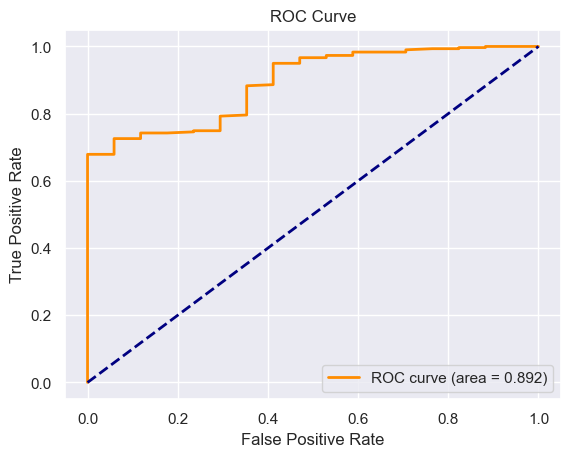

In [28]:
fprs, tprs, thresholds = roc_curve(y_true = df_train['higher'], y_score = df_train['predicted_probabilites'])
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
plot_roc(fprs, tprs, auc)

Since we want to minimize our false positive rate while maximizing our true positive rate, I believe an appropriate predictive probability threshold would be roughly 0.75.

In [29]:
df_train['Predicted'] = 1 * (df_train['predicted_probabilites'] >= 0.75)
confusion_matrix(y_true=df_train['higher'], y_pred=df_train['Predicted'])
tn, fp, fn, tp = confusion_matrix(y_true=df_train['higher'], y_pred=df_train['Predicted']).ravel()
(tn, fp, fn, tp)

(8, 9, 10, 289)

In [30]:
accuracy = (tn+tp)/(tn+tp+fn+fp)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
print('Accuracy Rate: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)

Accuracy Rate:  0.939873417721519
Sensitivity:  0.9665551839464883
Specificity:  0.47058823529411764


Overall, I am generally satisfied with the results of my model. A 94% accuracy rate is very good, as it indicates that our model accurately predicts whether students want to pursue a higher education 94% of the time. Similarly, the sensativity rate of 96% is excellent. As our main goal is to minimize false negatives, a 96% sensativity rate tells us that our model accurately predicts the true positves (students who want to pursue a higher education) 96% of the time. The 47% specificity rate is rather low, but this is okay, as we are more focused on minimizing our false negatives. 

Our approach to answer our research questions was to first create a logistic regression model that predicts whether a student wants to pursue a higher education level based on certain relevant predictors. We then assessed the models strength by calculating its psuedo R^2, auc, accuracy, sensativity, and specificity. Our model directly answers our research question, as we were able to acurately predict whether or not a student wants to pursue a higher education, and we were able to minimize false negatives. Furthermore, our classifier performed well on our data, yeilding a 94% accurary rate and a 96% sensativity rate. 

## 4. Conclusion

In this analysis, we answered 2 sets of research questions. Our main goals were to assess whether there is the relationship between a students past failed classes and their final grade, after controlling for study time, absences, health, and their first and second period grades using a lienar regression model, as well as to figure out whether there is a relationship between a student wanting to pursue higher education and varibales such as study time, failures, family support, and their first and second period grades using a logistic regression model. We accomplished both these goals, as we found that there is not a significant relationship between the amount of past classes a student has failed and their final grade, as my CI for this variable included the value 0. Additionally, we found that there is a relationship between a student wanting to pursue a higher education and relevant predictor variables.  

My analysis did run into some limitations. My main limitation occured with my linear regression model, when I found that my fitted vs. residuals plot showed that my data did not meet the linearity assumption. Similarly, from the QQ plot, we found that our data did not meet the normalirt assumption. These findings casted a shadow over my findings, as they might indicate that my model was not the best fit for assessing the relationship between our variables of interest. 

If someone was to conduct future work on this data based on these analayses, they could attempt to find what other predictor variables could increase the strength and accuracy of both of my models. Furthermore, a future reseacher could attempt to find other limitations within the data, such as potential biases. Additioanally, they could also check to see if there is a difference between men and women when it comes to final grades, and whether or not they wish to pursue a higher education. 